In [4]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
 
import scipy.linalg as la
from numpy.linalg import eig

from sklearn.neighbors import KNeighborsClassifier

In [5]:
iris_data = np.loadtxt('iris.txt')
iris_data = np.expand_dims(iris_data, axis=2)

data = iris_data[:, :4]
label = iris_data[:, 4]

# print(data.shape)
# print(label.shape)
# (150, 4, 1)
# (150, 1)

In [10]:
def get_m(data):
    n = data.shape[0]
    sum = np.zeros(shape=(1, data.shape[1]))
    for i in range(n):
        sum += data[i]

    m = sum / n

    return m

In [11]:
def get_c(data):
    m = get_m(data)
    n = data.shape[0]
    f_n = data.shape[1]

    c = np.zeros(shape=(f_n, f_n))
    for i in range(n):
        c += ((data[i] - m)).dot((data[i] - m).T)

    c = c/n

    return c

In [12]:
def get_eigen_vals_and_eigen_vects(data):
    c = get_c(data[:, 0:4])
    eigen = la.eig(c)
    eigen_vals = eigen[0]
    eigen_vects = np.expand_dims(eigen[1], axis=2)

    for i in range(eigen_vects.shape[0]):
        eigen_vects[i] = eigen_vects[i] / np.linalg.norm(eigen_vects[i])
    
    return eigen_vals, eigen_vects

In [14]:
def pca(data, eigen_vects):
    m = get_m(data[:, :, 0])
    n = data.shape[0]
    eigen_vects_n = eigen_vects.shape[1]
    eigen_vects = eigen_vects.reshape((eigen_vects.shape[0], eigen_vects.shape[1]))

    output = np.zeros(shape=(eigen_vects_n, 1))
    for i in range(n):
        output = np.hstack((output, eigen_vects.T.dot(data[i] - m.T)))

    output = output[:, 1:]
    
    return output

In [27]:
def get_accuracy(data, label, eigen_vects):
    pca = pca(data, eigen_vects)
    acc = two_fold_cross_validation(pca_data, label)
    return acc

In [37]:
def two_fold_cross_validation(data, label):
    train_data, train_label, test_label, test_label = get_train_and_test(data, label)
    accuracy_1 = knn_model(train_data, train_label, test_label, test_label)
    
    train_data, test_data = test_data, train_data
    train_label, test_label = test_label, train_label
    accuracy_2 = knn_model(train_data, train_label, test_label, test_label)

    acc = (acc_1 + acc_2) / 2
    return acc

In [38]:
def get_train_and_test(data):

    train_data = np.concatenate((data[:, 0:25], data[:, 50:75], data[:, 100:125]), axis=1)
    train_data = train_data.reshape((train_data.shape[0], train_data.shape[1])).T
    
    test_data = np.concatenate((data[:, 25:50], data[:, 75:100], data[:, 125:150]), axis=1)
    test_data = np.reshape(test_data, (test_data.shape[0], test_data.shape[1])).T

    train_label = np.concatenate((label[0:25], label[50:75], label[100:125]), axis=0)
    test_label = np.concatenate((label[25:50], label[75:100], label[125:150]), axis=0)

    return train_data, train_label, test_label, test_label

In [44]:
def knn_model(train_data, train_label, test_data, test_label):
    knn_model = KNeighborsClassifier(n_neighbors=3)
    knn_model.fit(train_data, train_label)

    score = knn_model.score(test_data, test_label)
    return score

In [45]:
eigen_vals, eigen_vects = get_eigen_vals_and_eigen_vects(iris_data[:, 0:4, 0])

In [46]:
eigen_vals

array([1.77635684e-15+0.j, 1.81553173e+01+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j])

In [47]:
eigen_vects

array([[[-8.66025404e-01],
        [ 5.00000000e-01],
        [-8.47050736e-19],
        [-8.47050736e-19]],

       [[ 2.88675135e-01],
        [ 5.00000000e-01],
        [-5.77350269e-01],
        [-5.77350269e-01]],

       [[ 2.88675135e-01],
        [ 5.00000000e-01],
        [ 7.88675135e-01],
        [-2.11324865e-01]],

       [[ 2.88675135e-01],
        [ 5.00000000e-01],
        [-2.11324865e-01],
        [ 7.88675135e-01]]])

In [48]:
for i in range(eigen_vects.shape[0]):
    acc = get_accuracy(data, label, eigen_vects[i])
    print("Accuracy that project data onto eigenvector {} is : {}%".format(i, acc))

Accuracy that project data onto eigenvector 0 is : 0.8400000000000001%
Accuracy that project data onto eigenvector 1 is : 0.9466666666666667%
Accuracy that project data onto eigenvector 2 is : 0.8200000000000001%
Accuracy that project data onto eigenvector 3 is : 0.5666666666666667%


In [50]:
top_eigen_vals = np.argsort(eigen_vals)
for top_i in range(2, 4 + 1, 1):
    acc = get_accuracy(data, label, eigen_vects[:, top_eigen_vals[0:top_i]])
    print("Accuracy is {}% when data are projected onto eigenvectors V: {}\n".format(acc, top_eigen_vals[0:top_i]))

Accuracy is 0.94% when data are projected onto eigenvectors V: [2 3]

Accuracy is 0.96% when data are projected onto eigenvectors V: [2 3 0]

Accuracy is 0.94% when data are projected onto eigenvectors V: [2 3 0 1]



[Text(0, 0.5, 'y'), Text(0.5, 0, 'x')]

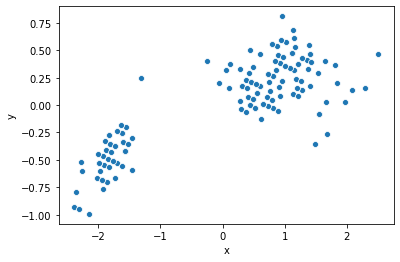

In [51]:
pca_data = pca(data, eigen_vects[:, top_eigen_vals[0:2]]).T

sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1]).set(xlabel="x", ylabel="y")